In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
%matplotlib inline

In [316]:
import tensorflow as tf
import random

#We set a random seed to ensure omore consistent reslts across the runs
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)


In [317]:
#This line of code loads the data
data = pd.read_csv("C:/Users/abiok/Downloads/Ph_Temp.csv")
data.head()

,_id,nodeId,firmware,battery,battery_percent,counter,sensor_type,sensor_data.pH,sensor_data.Temp,sensor_name,...,original.data[7],original.data[8],original.data[9],original.data[10],original.data[11],original.data[12],original.type,rssi,sig,timestamp
0,650241572f9dea1904c7ade4,0,4,3.29,99.64,7,61,7.02,23.32,pH and Temperature Sensor,...,61,0,2,190,9,28,receive_packet,40,00:13:a2:00:42:29:e7:061694473603072,1.694470e+12
1,6502419d2f9dea1904c7ae6d,0,4,3.29,99.64,8,61,6.98,23.38,pH and Temperature Sensor,...,61,0,2,186,9,34,receive_packet,40,00:13:a2:00:42:29:e7:061694473673422,1.694470e+12
2,650241e32f9dea1904c7aef8,0,4,3.29,99.64,9,61,7.06,23.36,pH and Temperature Sensor,...,61,0,2,194,9,32,receive_packet,40,00:13:a2:00:42:29:e7:061694473743777,1.694470e+12
3,6502422a2f9dea1904c7af7f,0,4,3.29,99.64,10,61,7.07,23.38,pH and Temperature Sensor,...,61,0,2,195,9,34,receive_packet,40,00:13:a2:00:42:29:e7:061694473814128,1.694470e+12
4,650242702f9dea1904c7b009,0,4,3.29,99.64,11,61,7.08,23.41,pH and Temperature Sensor,...,61,0,2,196,9,37,receive_packet,40,00:13:a2:00:42:29:e7:061694473884477,1.694470e+12


### EXPLORATORY DATA ANLYSIS (EDA) and DATA PRE-PROCESSING

**Check the head of the data**

In [318]:
#This line of code shows the first 5 cells in our data setb
data.head(5)

,_id,nodeId,firmware,battery,battery_percent,counter,sensor_type,sensor_data.pH,sensor_data.Temp,sensor_name,...,original.data[7],original.data[8],original.data[9],original.data[10],original.data[11],original.data[12],original.type,rssi,sig,timestamp
0,650241572f9dea1904c7ade4,0,4,3.29,99.64,7,61,7.02,23.32,pH and Temperature Sensor,...,61,0,2,190,9,28,receive_packet,40,00:13:a2:00:42:29:e7:061694473603072,1.694470e+12
1,6502419d2f9dea1904c7ae6d,0,4,3.29,99.64,8,61,6.98,23.38,pH and Temperature Sensor,...,61,0,2,186,9,34,receive_packet,40,00:13:a2:00:42:29:e7:061694473673422,1.694470e+12
2,650241e32f9dea1904c7aef8,0,4,3.29,99.64,9,61,7.06,23.36,pH and Temperature Sensor,...,61,0,2,194,9,32,receive_packet,40,00:13:a2:00:42:29:e7:061694473743777,1.694470e+12
3,6502422a2f9dea1904c7af7f,0,4,3.29,99.64,10,61,7.07,23.38,pH and Temperature Sensor,...,61,0,2,195,9,34,receive_packet,40,00:13:a2:00:42:29:e7:061694473814128,1.694470e+12
4,650242702f9dea1904c7b009,0,4,3.29,99.64,11,61,7.08,23.41,pH and Temperature Sensor,...,61,0,2,196,9,37,receive_packet,40,00:13:a2:00:42:29:e7:061694473884477,1.694470e+12


**Check the basic information on the data set.**

In [319]:
#This line of codes shows the full information about our data
data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   _id                                 99 non-null     object 
 1   nodeId                              99 non-null     int64  
 2   firmware                            99 non-null     int64  
 3   battery                             99 non-null     float64
 4   battery_percent                     99 non-null     float64
 5   counter                             99 non-null     int64  
 6   sensor_type                         99 non-null     int64  
 7   sensor_data.pH                      99 non-null     float64
 8   sensor_data.Temp                    99 non-null     float64
 9   sensor_name                         99 non-null     object 
 10  type                                99 non-null     object 
 11  addr                                99 non-null

**'describe()' method to get the statistical summary of the various features of the data set**

In [320]:
#This line of code shows the statistical summary of our data set
data.describe(percentiles=[0.1,0.25,0.5,0.75,0.9])

,nodeId,firmware,battery,battery_percent,counter,sensor_type,sensor_data.pH,sensor_data.Temp,received,original.receive_options.ack,...,original.data[5],original.data[6],original.data[7],original.data[8],original.data[9],original.data[10],original.data[11],original.data[12],rssi,timestamp
count,99.0,99.0,9.900000e+01,9.900000e+01,99.000000,99.0,99.000000,99.000000,9.900000e+01,99.0,...,99.000000,99.0,99.0,99.000000,99.0,99.000000,99.000000,99.000000,99.0,9.900000e+01
mean,0.0,4.0,3.290000e+00,9.964000e+01,53.858586,61.0,7.046970,23.204242,1.694478e+12,0.0,...,53.858586,0.0,61.0,0.020202,2.0,192.696970,8.646465,106.929293,40.0,1.694478e+12
std,0.0,0.0,2.678095e-15,2.856635e-14,27.657161,0.0,0.047088,0.325627,4.178554e+06,0.0,...,27.657161,0.0,0.0,0.141407,0.0,4.708773,0.480500,91.835284,0.0,4.178554e+06
min,0.0,4.0,3.290000e+00,9.964000e+01,7.000000,61.0,6.950000,22.630000,1.694470e+12,0.0,...,7.000000,0.0,61.0,0.000000,2.0,183.000000,8.000000,4.000000,40.0,1.694470e+12
10%,0.0,4.0,3.290000e+00,9.964000e+01,16.800000,61.0,6.988000,22.710000,1.694470e+12,0.0,...,16.800000,0.0,61.0,0.000000,2.0,186.800000,8.000000,34.000000,40.0,1.694470e+12
25%,0.0,4.0,3.290000e+00,9.964000e+01,29.500000,61.0,7.010000,22.840000,1.694480e+12,0.0,...,29.500000,0.0,61.0,0.000000,2.0,189.000000,8.000000,40.000000,40.0,1.694480e+12
50%,0.0,4.0,3.290000e+00,9.964000e+01,54.000000,61.0,7.050000,23.410000,1.694480e+12,0.0,...,54.000000,0.0,61.0,0.000000,2.0,193.000000,9.000000,44.000000,40.0,1.694480e+12
75%,0.0,4.0,3.290000e+00,9.964000e+01,77.500000,61.0,7.085000,23.460000,1.694480e+12,0.0,...,77.500000,0.0,61.0,0.000000,2.0,196.500000,9.000000,223.000000,40.0,1.694480e+12
90%,0.0,4.0,3.290000e+00,9.964000e+01,92.200000,61.0,7.102000,23.500000,1.694480e+12,0.0,...,92.200000,0.0,61.0,0.000000,2.0,198.200000,9.000000,236.000000,40.0,1.694480e+12
max,0.0,4.0,3.290000e+00,9.964000e+01,101.000000,61.0,7.140000,23.530000,1.694480e+12,0.0,...,101.000000,0.0,61.0,1.000000,2.0,202.000000,9.000000,251.000000,40.0,1.694480e+12


**Data Cleaning and Preprocessing**

In [321]:
#This line of code Checks for missing values
print(data.isnull().sum())

_id                                    0
nodeId                                 0
firmware                               0
battery                                0
battery_percent                        0
counter                                0
sensor_type                            0
sensor_data.pH                         0
sensor_data.Temp                       0
sensor_name                            0
type                                   0
addr                                   0
received                               0
original.mac                           0
original.receive_options.ack           0
original.receive_options.broadcast     0
original.receive_options.type         99
original.data[0]                       0
original.data[1]                       0
original.data[2]                       0
original.data[3]                       0
original.data[4]                       0
original.data[5]                       0
original.data[6]                       0
original.data[7]

In [322]:
#This line of code Drops the 'original.receive_options.type' column since it entirely NaN
data.drop('original.receive_options.type', axis=1, inplace=True)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 33 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   _id                                 99 non-null     object 
 1   nodeId                              99 non-null     int64  
 2   firmware                            99 non-null     int64  
 3   battery                             99 non-null     float64
 4   battery_percent                     99 non-null     float64
 5   counter                             99 non-null     int64  
 6   sensor_type                         99 non-null     int64  
 7   sensor_data.pH                      99 non-null     float64
 8   sensor_data.Temp                    99 non-null     float64
 9   sensor_name                         99 non-null     object 
 10  type                                99 non-null     object 
 11  addr                                99 non-null

In [323]:
#This line of code focuses on our 5 independent variables
Independent_var = ['sensor_data.pH', 'sensor_data.Temp', 'battery_percent','rssi', 'counter']
data_Indep = data[Independent_var]

Summary_statistics = data_relevant.describe()
Summary_statistics

,sensor_data.pH,sensor_data.Temp,battery_percent,rssi,counter
count,99.000000,99.000000,9.900000e+01,99.0,99.000000
mean,7.046970,23.204242,9.964000e+01,40.0,53.858586
std,0.047088,0.325627,2.856635e-14,0.0,27.657161
min,6.950000,22.630000,9.964000e+01,40.0,7.000000
25%,7.010000,22.840000,9.964000e+01,40.0,29.500000
50%,7.050000,23.410000,9.964000e+01,40.0,54.000000
75%,7.085000,23.460000,9.964000e+01,40.0,77.500000
max,7.140000,23.530000,9.964000e+01,40.0,101.000000


**Using Interquartile Range to fnd outliers**

**Reference:**
**ChatGPT.(2024). Python code for data Interquartile range. Retrieved from the conversation with ChatGPT on February 18, 2024, using OpenAI's GPT-3.5 model.**

In [324]:
#This line of code calculates outliers
lower_bound_pH = 6.8975
upper_bound_pH = 7.1975
outliers_pH = data[(data['sensor_data.pH'] < lower_bound_pH) | (data['sensor_data.pH'] > upper_bound_pH)]

#This line of code calculates the outliers for temperature
lower_bound_temp = 21.93
upper_bound_temp = 24.87
outliers_temp = data[(data['sensor_data.Temp'] < lower_bound_temp) | (data['sensor_data.Temp'] > upper_bound_temp)]

print("Outliers for pH:")
print(outliers_pH)

print("Outliers for temperature:")
print(outliers_temp)


Outliers for pH:
Empty DataFrame
Columns: [_id, nodeId, firmware, battery, battery_percent, counter, sensor_type, sensor_data.pH, sensor_data.Temp, sensor_name, type, addr, received, original.mac, original.receive_options.ack, original.receive_options.broadcast, original.data[0], original.data[1], original.data[2], original.data[3], original.data[4], original.data[5], original.data[6], original.data[7], original.data[8], original.data[9], original.data[10], original.data[11], original.data[12], original.type, rssi, sig, timestamp]
Index: []

[0 rows x 33 columns]
Outliers for temperature:
Empty DataFrame
Columns: [_id, nodeId, firmware, battery, battery_percent, counter, sensor_type, sensor_data.pH, sensor_data.Temp, sensor_name, type, addr, received, original.mac, original.receive_options.ack, original.receive_options.broadcast, original.data[0], original.data[1], original.data[2], original.data[3], original.data[4], original.data[5], original.data[6], original.data[7], original.data[

In [325]:
#This line of code calculates the outliers for variable battery
lower_bound_battery_percent = 3.29
upper_bound_battery_percent = 3.29
outliers_battery = data[(data['battery_percent'] < lower_bound_battery_percent) | (data['battery_percent'] > upper_bound_battery_percent)]

#This line of code calculates the outliers for variable RSSI
lower_bound_rssi = 61
upper_bound_rssi = 61
outliers_rssi = data[(data['rssi'] < lower_bound_rssi) | (data['rssi'] > upper_bound_rssi)]

#This line of code calculates the outliers for variable counter
lower_bound_counter = 0
upper_bound_counter = 0
outliers_counter = data[(data['counter'] < lower_bound_counter) | (data['counter'] > upper_bound_counter)]

print("Outliers for battery_percent:")
print(outliers_battery)

print("Outliers for RSSI:")
print(outliers_rssi)

print("Outliers for counter:")
print(outliers_counter)


Outliers for battery_percent:
                         _id  nodeId  firmware  battery  battery_percent  \
0   650241572f9dea1904c7ade4       0         4     3.29            99.64   
1   6502419d2f9dea1904c7ae6d       0         4     3.29            99.64   
2   650241e32f9dea1904c7aef8       0         4     3.29            99.64   
3   6502422a2f9dea1904c7af7f       0         4     3.29            99.64   
4   650242702f9dea1904c7b009       0         4     3.29            99.64   
..                       ...     ...       ...      ...              ...   
94  65025a122f9dea1904c7e052       0         4     3.29            99.64   
95  65025a582f9dea1904c7e0df       0         4     3.29            99.64   
96  65025a9f2f9dea1904c7e177       0         4     3.29            99.64   
97  65025ae52f9dea1904c7e207       0         4     3.29            99.64   
98  65025b2b2f9dea1904c7e29c       0         4     3.29            99.64   

    counter  sensor_type  sensor_data.pH  sensor_data.Tem

### Basic plotting and visualization on the data set

C:\Users\abiok\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


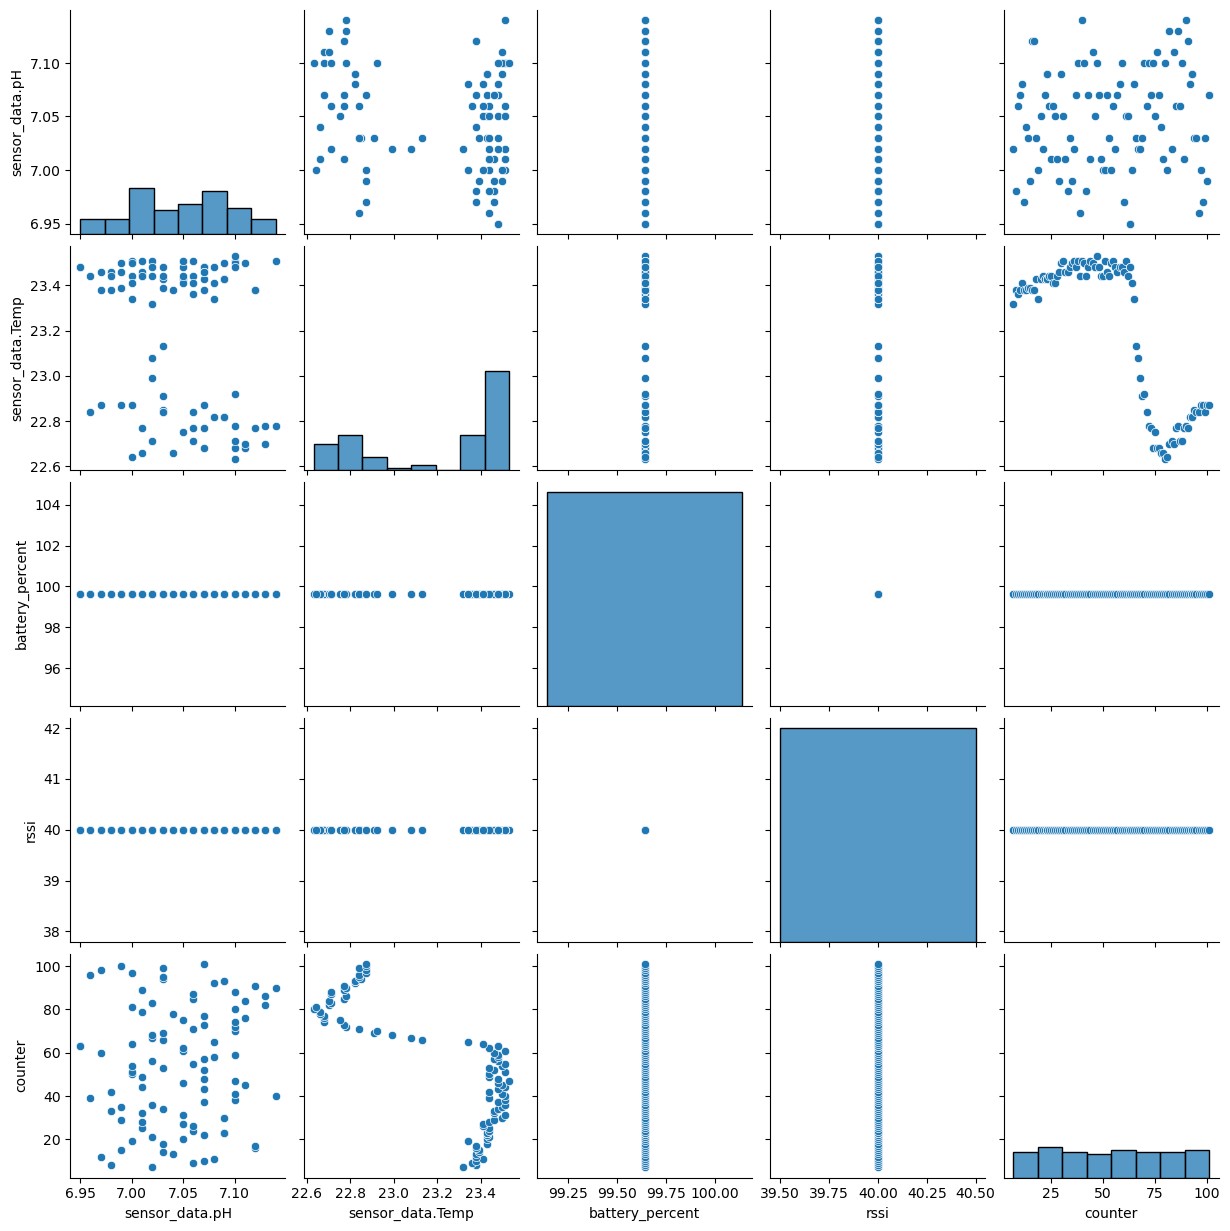

In [326]:
#This line of code shows the Pairplot for visualizing the relationships between the variables chosen
sns.pairplot(data[['sensor_data.pH', 'sensor_data.Temp', 'battery_percent', 'rssi', 'counter']])
plt.show()

C:\Users\abiok\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


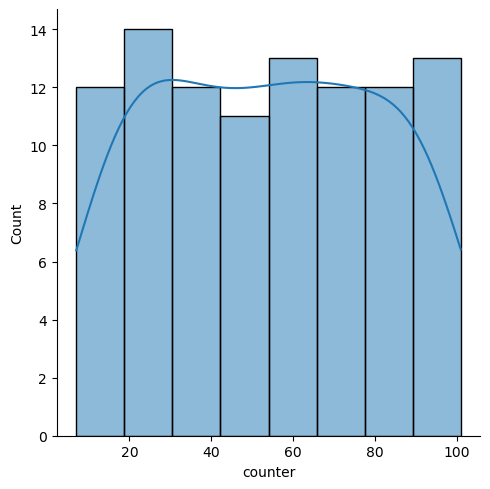

In [327]:
# Visualization of counter distribution
sns.displot(data, x='counter', kde=True)
plt.show()

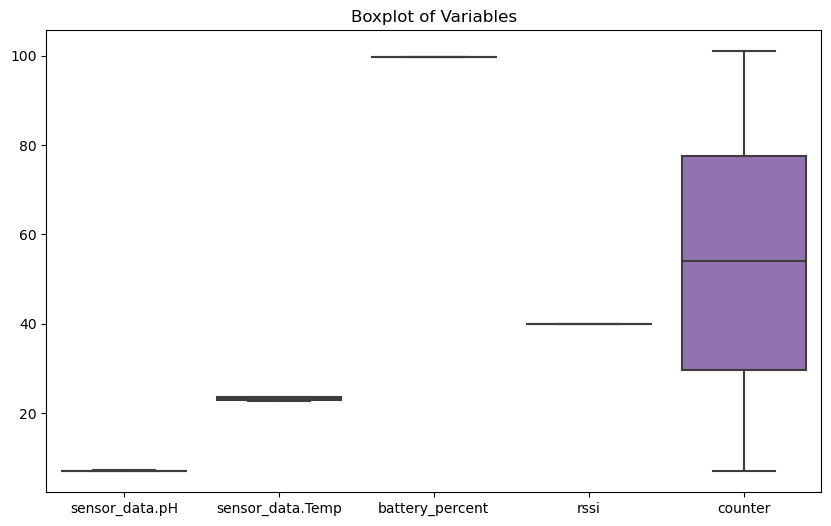

In [328]:
# Boxplot for detecting outliers
plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['sensor_data.pH', 'sensor_data.Temp', 'battery_percent', 'rssi', 'counter']])
plt.title('Boxplot of Variables')
plt.show()

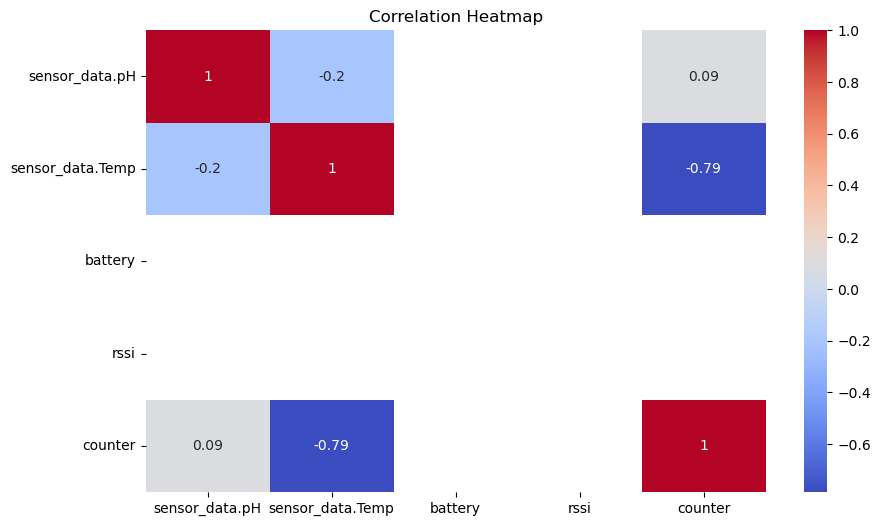

In [329]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(data[['sensor_data.pH', 'sensor_data.Temp', 'battery', 'rssi', 'counter']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Column Creation 1: binary_pH_Temp: This gives binary classification of pH rates in the ACWA water system The outcome would give a level neutral when pH_Temp is greater than 7 and neutral or less when pH_Temp is (=<7)**

In [330]:
# This line of code creates the binary variable for pH rate
data.loc[:, 'binary_pH_Temp'] = (data_relevant['sensor_data.pH'] > 7).astype(int)

# This line of code adds the new column to our
data['binary_pH_Temp'] = binary_pH_Temp
data

,_id,nodeId,firmware,battery,battery_percent,counter,sensor_type,sensor_data.pH,sensor_data.Temp,sensor_name,...,original.data[8],original.data[9],original.data[10],original.data[11],original.data[12],original.type,rssi,sig,timestamp,binary_pH_Temp
0,650241572f9dea1904c7ade4,0,4,3.29,99.64,7,61,7.02,23.32,pH and Temperature Sensor,...,0,2,190,9,28,receive_packet,40,00:13:a2:00:42:29:e7:061694473603072,1.694470e+12,1
1,6502419d2f9dea1904c7ae6d,0,4,3.29,99.64,8,61,6.98,23.38,pH and Temperature Sensor,...,0,2,186,9,34,receive_packet,40,00:13:a2:00:42:29:e7:061694473673422,1.694470e+12,0
2,650241e32f9dea1904c7aef8,0,4,3.29,99.64,9,61,7.06,23.36,pH and Temperature Sensor,...,0,2,194,9,32,receive_packet,40,00:13:a2:00:42:29:e7:061694473743777,1.694470e+12,1
3,6502422a2f9dea1904c7af7f,0,4,3.29,99.64,10,61,7.07,23.38,pH and Temperature Sensor,...,0,2,195,9,34,receive_packet,40,00:13:a2:00:42:29:e7:061694473814128,1.694470e+12,1
4,650242702f9dea1904c7b009,0,4,3.29,99.64,11,61,7.08,23.41,pH and Temperature Sensor,...,0,2,196,9,37,receive_packet,40,00:13:a2:00:42:29:e7:061694473884477,1.694470e+12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,65025a122f9dea1904c7e052,0,4,3.29,99.64,97,61,7.00,22.87,pH and Temperature Sensor,...,0,2,188,8,239,receive_packet,40,00:13:a2:00:42:29:e7:061694479934223,1.694480e+12,0
95,65025a582f9dea1904c7e0df,0,4,3.29,99.64,98,61,6.97,22.87,pH and Temperature Sensor,...,0,2,185,8,239,receive_packet,40,00:13:a2:00:42:29:e7:061694480004569,1.694480e+12,0
96,65025a9f2f9dea1904c7e177,0,4,3.29,99.64,99,61,7.03,22.84,pH and Temperature Sensor,...,0,2,191,8,236,receive_packet,40,00:13:a2:00:42:29:e7:061694480074914,1.694480e+12,1
97,65025ae52f9dea1904c7e207,0,4,3.29,99.64,100,61,6.99,22.87,pH and Temperature Sensor,...,1,2,187,8,239,receive_packet,40,00:13:a2:00:42:29:e7:061694480145255,1.694480e+12,0


In [331]:
# This line of code Checks the balance of the new binary target
target_balance = data['binary_pH_Temp'].value_counts(normalize=True)


target_balance, data.head()

(binary_pH_Temp
 1    0.787879
 0    0.212121
 Name: proportion, dtype: float64,
                         _id  nodeId  firmware  battery  battery_percent  \
 0  650241572f9dea1904c7ade4       0         4     3.29            99.64   
 1  6502419d2f9dea1904c7ae6d       0         4     3.29            99.64   
 2  650241e32f9dea1904c7aef8       0         4     3.29            99.64   
 3  6502422a2f9dea1904c7af7f       0         4     3.29            99.64   
 4  650242702f9dea1904c7b009       0         4     3.29            99.64   
 
    counter  sensor_type  sensor_data.pH  sensor_data.Temp  \
 0        7           61            7.02             23.32   
 1        8           61            6.98             23.38   
 2        9           61            7.06             23.36   
 3       10           61            7.07             23.38   
 4       11           61            7.08             23.41   
 
                  sensor_name  ... original.data[8] original.data[9]  \
 0  pH and Temp

## Selecting and Splitting the data

### Imbalance of train-split data set and class distribution

**My training set consists of 79 samples, and my testing set has 20 samples. This split seems to follow an 80/20 ratio.**

**However, I notice that in the training set, about 77.2% of the samples belong to class '1' and about 22.8% to class '0'. For the testing set, the distribution is 85% for class '1' and 15% for class '0'. This indicates there is some discrepancy with the representation of the classes between the training and testing datat sets as it is both skewed towards class "1"**

In [332]:
from sklearn.model_selection import train_test_split

# Select only numeric columns for features
numeric_features = data.select_dtypes(include=[np.number])

# This line of code separates the features and the target
X = numeric_features.drop('binary_pH_Temp', axis=1)
y = numeric_features['binary_pH_Temp']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Set Size:", X_train.shape)
print("Testing Set Size:", X_test.shape)

Training Set Size: (79, 26)
Testing Set Size: (20, 26)


In [333]:
# Check class distribution in training set
class_distribution_train = y_train.value_counts(normalize=True)
print("Class Distribution in Training Set:\n", class_distribution_train)

# Check class distribution in testing set
class_distribution_test = y_test.value_counts(normalize=True)
print("Class Distribution in Testing Set:\n", class_distribution_test)


Class Distribution in Training Set:
 binary_pH_Temp
1    0.772152
0    0.227848
Name: proportion, dtype: float64
Class Distribution in Testing Set:
 binary_pH_Temp
1    0.85
0    0.15
Name: proportion, dtype: float64


**To address the imbalance issue, I used the stratified sampling method. This ensures that the training and testing data sets have the same percentage approximately of the samples of eah of the binary classes**

**Reference:**
**ChatGPT.(2024). Python code for Stratified sampling. Retrieved from the conversation with ChatGPT on April 10, 2024, using OpenAI's GPT-3.5 model.**

In [334]:
from sklearn.model_selection import train_test_split

# This line of code Select only numeric columns to avoid errors and we call it numeric.features
numeric_features = data.select_dtypes(include=[np.number])

# This line of code separates the features and the target
X = numeric_features.drop('binary_pH_Temp', axis=1)
y = numeric_features['binary_pH_Temp']


# Use stratified sampling to maintain the same class proportion in both training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# This line of codePrint the result of the class distribution
print("New Class Distribution in Training Set:\n", y_train.value_counts(normalize=True))
print("New Class Distribution in Testing Set:\n", y_test.value_counts(normalize=True))


New Class Distribution in Training Set:
 binary_pH_Temp
1    0.78481
0    0.21519
Name: proportion, dtype: float64
New Class Distribution in Testing Set:
 binary_pH_Temp
1    0.8
0    0.2
Name: proportion, dtype: float64


### Data Balancing

**Our class distribution in the training set is about 78.48% for class "1" and about 21.52% for class "0". The testing is set also shows about 80% for class "1" and about 20% for class "0". This shows a better representation of the overall dataset.**

**Data Balancing: To avoid issues with bias in our model, we want to further address the minority class which is the binary data created. I used the synthetic minority over-sampling (SMOTE) technique  for the minority class which is the newly created binary column so that my model is equally shown to both classes and there by resolving any balance issues**

In [335]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to only the training data to handle class imbalance
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Print the shape of balanced features and target
print("Shape of X_train_res (balanced features):", X_train_res.shape)
print("Shape of y_train_res (balanced target):", y_train_res.shape)


Shape of X_train_res (balanced features): (124, 26)
Shape of y_train_res (balanced target): (124,)


In [336]:
print("Class distribution after SMOTE:\n", y_train_res.value_counts(normalize=True))


Class distribution after SMOTE:
 binary_pH_Temp
1    0.5
0    0.5
Name: proportion, dtype: float64


### Feature Scaling

**We now have our balanced data and we use conduct the feature scaling to ensure the data balancing we did using SMOTE is properly scaled**

In [337]:
from sklearn.preprocessing import StandardScaler

# Scaling the features
scaler = StandardScaler()
X_train_res = scaler.fit_transform(X_train_res)
X_test = scaler.transform(X_test)


In [338]:
# Upgrade TensorFlow
!pip install --upgrade tensorflow

## Neural Network Method Process

I chose the **Artificial Neural Network (ANN), specifically a feedforward neural network** using the Sequential model from the Keras library. This model was chosen because it suits the binary classification framework in this case where we are predicting water pH levels indicating if they are above neutral (>7) or not (≤7).

### Hyperparameter Tuning

**Hyperparameters for Consideration:**

1. Number of Layers and Neurons per Layer: This captures the complexity of the data without overfitting.

2. Activation Functions: This introduces non-linearities into the model effectively.

3. Optimizer: This hyperparameter minimizes the loss function efficiently.

4. Learning Rate: The learning rate Controls the speed of learning.

5. Batch Size and Number of Epochs: This has an imapct on the training dynamics and computational efficiency.

**We wanted to use Grid Search with the Keras and sklearn library to search for the best tuning strategy and select the best hyperparameters but there were several issues with the keras.wrappers not being found due to recent updates of the Keras and TensorFlow library.**

**After several attempts, we proceeded to use a gridserach with a stratified K-Fold cross-validation which has the TensorFlow's Keras API in it.**

**Reference:**
**ChatGPT.(2024). Python code for gridserach with a stratified K-Fold cross-validation. Retrieved from the conversation with ChatGPT on April 10, 2024, using OpenAI's GPT-3.5 model.**

In [339]:
from tensorflow.keras.layers import Input
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def create_model(layers=[32], activation='relu'):
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))  # Adding an Input layer explicitly
    for layer_size in layers:
        model.add(Dense(layer_size, activation=activation))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define the grid of hyperparameters
params_grid = {
    'layers': [[32], [64, 32], [32, 16, 8]],
    'activation': ['relu', 'tanh'],
    'batch_size': [16, 32, 64],
    'epochs': [50, 100]
}

best_score = 0
best_params = {}

# Stratified K-Fold ensures each fold is a good representative of the whole
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# Iterate over all combinations of parameters
for layers in params_grid['layers']:
    for activation in params_grid['activation']:
        for batch_size in params_grid['batch_size']:
            for epochs in params_grid['epochs']:
                scores = []
                for train_ix, test_ix in kfold.split(X_train, y_train):
                    # Create model with current set of parameters
                    model = create_model(layers=layers, activation=activation)
                    # Fit the model
                    model.fit(X_train.iloc[train_ix], y_train.iloc[train_ix], 
                              epochs=epochs, batch_size=batch_size, verbose=0)

                    # Evaluate the model
                    _, accuracy = model.evaluate(X_train.iloc[test_ix], y_train.iloc[test_ix], verbose=0)
                    scores.append(accuracy)
                # Compute average score across all folds
                mean_score = np.mean(scores)
                if mean_score > best_score:
                    best_score = mean_score
                    best_params = {
                        'layers': layers,
                        'activation': activation,
                        'batch_size': batch_size,
                        'epochs': epochs
                    }

print("Best Score: {:.2f}".format(best_score))
print("Best Parameters:", best_params)


Best Score: 0.78
Best Parameters: {'layers': [32], 'activation': 'relu', 'batch_size': 16, 'epochs': 50}


**Building and Compiling our Artificial Neural Netwrok (ANN)**

In [342]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Build and train the model according to the best hyperparameters
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_res.shape[1],)),  # Only one hidden layer of 32 units
    Dense(1, activation='sigmoid')  # Output layer
])
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_res, y_train_res, validation_data=(X_test, y_test), epochs=50, batch_size=16)


Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5413 - loss: 0.6937 - val_accuracy: 0.7500 - val_loss: 0.6458
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7053 - loss: 0.6470 - val_accuracy: 0.8000 - val_loss: 0.5966
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7713 - loss: 0.6075 - val_accuracy: 0.8000 - val_loss: 0.5535
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7946 - loss: 0.5731 - val_accuracy: 0.8500 - val_loss: 0.5168
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8303 - loss: 0.5428 - val_accuracy: 0.8500 - val_loss: 0.4853
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8689 - loss: 0.5153 - val_accuracy: 0.9000 - val_loss: 0.4579
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8689 - loss: 0.4897 - val_accuracy: 0.9000 - val_loss: 0.4339
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8760 - loss: 0.4657 - val_accuracy: 0.9000 - val_loss: 0.4125


In [346]:
# Model training results
training_results = history.history
print(training_results)


{'accuracy': [0.5564516186714172, 0.725806474685669, 0.7822580933570862, 0.7903226017951965, 0.8467742204666138, 0.8709677457809448, 0.8709677457809448, 0.8790322542190552, 0.8790322542190552, 0.8951612710952759, 0.8870967626571655, 0.9112903475761414, 0.9193548560142517, 0.9274193644523621, 0.9274193644523621, 0.9516128897666931, 0.9516128897666931, 0.9516128897666931, 0.9596773982048035, 0.9677419066429138, 0.975806474685669, 0.975806474685669, 0.975806474685669, 0.9838709831237793, 0.9838709831237793, 0.9838709831237793, 0.9838709831237793, 0.9919354915618896, 0.9919354915618896, 0.9919354915618896, 0.9919354915618896, 0.9919354915618896, 0.9919354915618896, 0.9919354915618896, 0.9919354915618896, 0.9919354915618896, 0.9919354915618896, 0.9919354915618896, 0.9919354915618896, 0.9919354915618896, 0.9919354915618896, 0.9919354915618896, 0.9919354915618896, 0.9919354915618896, 0.9919354915618896, 0.9919354915618896, 0.9919354915618896, 0.9919354915618896, 0.9919354915618896, 0.99193549

1. The model achieved a validation accuracy of 100%, which is exceptional. This means that the model perfectly classified all validation samples in the test set.

2. The validation loss was reduced to 0.1200, aligning closely with the training loss, which indicates that the model was not overfitting and generalized well to unseen data.

In [347]:
# Evaluate the model
predictions = model.predict(X_test)
predicted_classes = (predictions > 0.5).astype(int)
print(classification_report(y_test, predicted_classes))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00        16

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



**Plot showing the accuracy of our model**

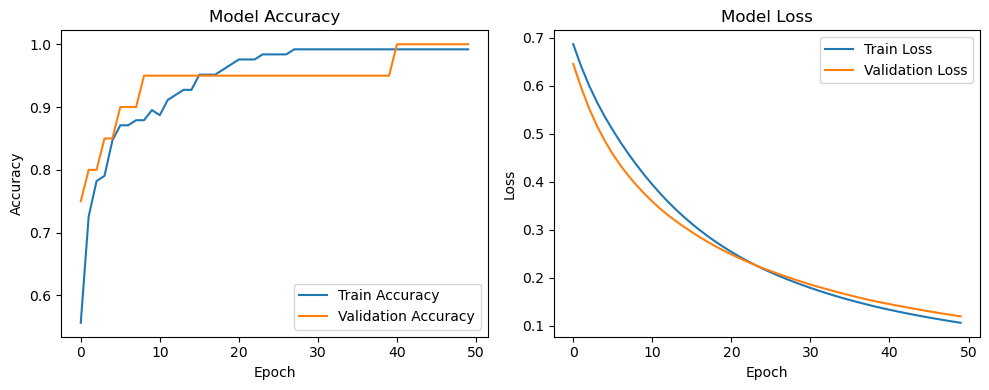

In [348]:
import matplotlib.pyplot as plt

#This line of code is Accuracy Plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# This line of code is our Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


In [350]:
# The following code would save the cleaned and preprocessed dataset to a CSV file
data.to_csv('BSE5124_NN_Batubo_pHTempBinary.csv', index=False)